In [1]:
#Python and machine learning

In [2]:
#导入numpy、pandas包。
import numpy as np
import pandas as pd

In [3]:
#定义表头
column = ['Code number',
          'Clump Thickness',
          'Uniformity of cell size',
          'Uniformity of cell shape',
          'Marginal adhesion',
          'Single epithelial cell size',
          'Bare nuclei',
          'Bland chromatin',
          'Nromal nucleoli',
          'Mitoses',
          'Class']

In [4]:
#读取相关数据
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data')
data.columns = column
data.shape



(698, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Code number                  698 non-null    int64 
 1   Clump Thickness              698 non-null    int64 
 2   Uniformity of cell size      698 non-null    int64 
 3   Uniformity of cell shape     698 non-null    int64 
 4   Marginal adhesion            698 non-null    int64 
 5   Single epithelial cell size  698 non-null    int64 
 6   Bare nuclei                  698 non-null    object
 7   Bland chromatin              698 non-null    int64 
 8   Nromal nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [6]:
#删除数据中有缺失的数据行
data = data.replace(to_replace='?', value=np.nan)
data = data.dropna(how='any')
data.shape

(682, 11)

<function matplotlib.pyplot.show(*args, **kw)>

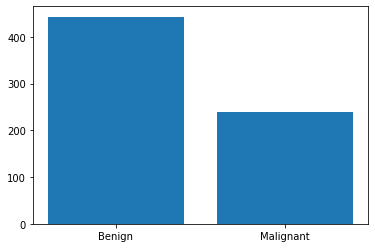

In [7]:
import matplotlib.pyplot as plt
Class = ('Benign', 'Malignant')
num = data['Class'].value_counts()
num = num.values
plt.bar(Class, num,)
plt.show

In [8]:
#对数据集进行划分，80%作为训练集，20%作为测试集
from sklearn.model_selection import train_test_split
train_X , test_X , train_y , test_y = train_test_split(data[column[1:10]], data['Class'], test_size=0.20, random_state=3)
print(test_y)


455    4
347    4
326    2
210    4
426    4
      ..
110    4
683    2
373    2
63     2
365    4
Name: Class, Length: 137, dtype: int64


In [9]:
train_y.value_counts()

2    360
4    185
Name: Class, dtype: int64

In [10]:
# 对类别型特征进行转化，成为特征向量。
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False)
ei_train_X = vec.fit_transform(train_X.to_dict(orient='record'))
ei_test_X = vec.transform(test_X.to_dict(orient='record'))
print(ei_train_X)

[[ 1.  0.  0. ...  2.  1.  1.]
 [ 0.  0.  0. ...  2.  1.  1.]
 [ 1.  0.  0. ...  2.  1.  1.]
 ...
 [ 1.  0.  0. ...  2.  1.  1.]
 [ 1.  0.  0. ...  2.  1.  1.]
 [ 0.  1.  0. ...  4. 10. 10.]]


In [11]:
# 使用单一决策树进行模型训练以及预测分析。
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(ei_train_X, train_y)
dtc_y_pred = dtc.predict(ei_test_X)


In [12]:
from sklearn.metrics import classification_report
print ('The accuracy of decision tree is', dtc.score(ei_test_X, test_y))
print (classification_report(dtc_y_pred, test_y,target_names = ['Benign', 'Malignant']))


The accuracy of decision tree is 0.9197080291970803
              precision    recall  f1-score   support

      Benign       0.96      0.91      0.94        88
   Malignant       0.85      0.94      0.89        49

    accuracy                           0.92       137
   macro avg       0.91      0.92      0.91       137
weighted avg       0.92      0.92      0.92       137



In [13]:
from sklearn.preprocessing import StandardScaler

#进行数据预处理，保证数据每个维度均值为0，方差为1  x' = (x-x.mean)/x.std  即x减去x的均值，再除以标准差
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.transform(test_X)
print(train_X,train_y)

[[-0.517103   -0.68706287 -0.73527694 ... -0.57721614 -0.60240195
  -0.33516549]
 [-0.517103   -0.68706287 -0.73527694 ... -0.98156421 -0.60240195
  -0.33516549]
 [-0.517103   -0.68706287 -0.73527694 ... -0.98156421 -0.60240195
  -0.33516549]
 ...
 [-1.22787509 -0.68706287 -0.73527694 ... -0.57721614 -0.60240195
  -0.33516549]
 [-0.517103   -0.68706287 -0.73527694 ... -0.17286807 -0.60240195
  -0.33516549]
 [ 0.19366909  2.27691548  2.31078167 ...  0.63582806  1.05071518
   0.84331963]] 275    2
460    2
255    2
239    2
75     2
      ..
675    2
264    2
659    2
257    2
680    4
Name: Class, Length: 545, dtype: int64


In [14]:
#使用逻辑斯蒂回归对模型进行学习训练。
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(train_X, train_y)
log_y_predict = log.predict(test_X)

In [15]:
#分别用准确率，召回率，精准率和F1指标来判断机器学习的准确度。
from sklearn.metrics import classification_report
print ('Accuracy of LR Classifier:{}'.format(log.score(test_X, test_y)))
print (classification_report(test_y, log_y_predict, target_names=['Benign', 'Malignant']))

Accuracy of LR Classifier:0.948905109489051
              precision    recall  f1-score   support

      Benign       0.94      0.98      0.96        83
   Malignant       0.96      0.91      0.93        54

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137



In [16]:
#使用随机梯度参数对模型进行学习训练。
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(train_X, train_y)
sgd_y_predict = sgd.predict(test_X)

In [17]:
#分别用准确率，召回率，精准率和F1指标来判断机器学习的准确度。
print ('Accuarcy of SGD Classifier:', sgd.score(test_X , test_y))
print (classification_report(test_y, sgd_y_predict, target_names=['Benign', 'Malignant']))

Accuarcy of SGD Classifier: 0.9635036496350365
              precision    recall  f1-score   support

      Benign       0.96      0.98      0.97        83
   Malignant       0.96      0.94      0.95        54

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137



In [18]:
#基于线性假设的支持向量机
from sklearn.svm import LinearSVC

lin = LinearSVC()
lin.fit(train_X, train_y)
lin_y_predict = lin.predict(test_X)

In [19]:
print ('Accuracy of LR Classifier:{}'.format(lin.score(test_X, test_y)))
print (classification_report(test_y, lin_y_predict, target_names=['Benign', 'Malignant']))

Accuracy of LR Classifier:0.948905109489051
              precision    recall  f1-score   support

      Benign       0.94      0.98      0.96        83
   Malignant       0.96      0.91      0.93        54

    accuracy                           0.95       137
   macro avg       0.95      0.94      0.95       137
weighted avg       0.95      0.95      0.95       137



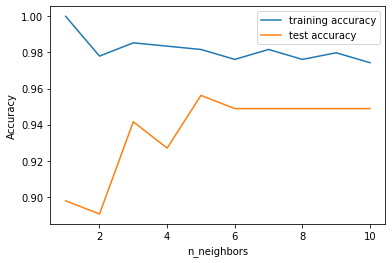

In [20]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
training_accuracy=[]
test_accuracy=[]
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_X,train_y)
    training_accuracy.append(knn.score(train_X,train_y))
    test_accuracy.append(knn.score(test_X,test_y))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [21]:
#k近邻算法
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_X, train_y)
knn_y_predict = knn.predict(test_X)

In [22]:
print ('The accuracy of K-Nearest Neighbor Classifier is:{}'.format(knn.score(test_X, test_y))) 
print (classification_report(test_y, knn_y_predict, target_names=['Benign', 'Malignant']))

The accuracy of K-Nearest Neighbor Classifier is:0.9562043795620438
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96        83
   Malignant       0.96      0.93      0.94        54

    accuracy                           0.96       137
   macro avg       0.96      0.95      0.95       137
weighted avg       0.96      0.96      0.96       137



Text(0, 0.5, 'Uniformity of cell shape')

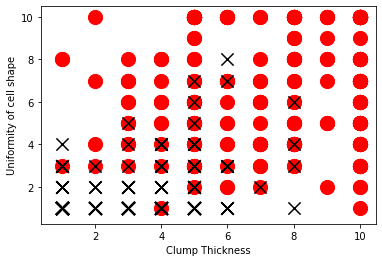

In [23]:
Benign = data.loc[data['Class'] == 2][['Clump Thickness', 'Uniformity of cell shape']]
Malignant =data.loc[data['Class'] == 4][['Clump Thickness', 'Uniformity of cell shape']]

import matplotlib.pyplot as plt
plt.scatter(Malignant['Clump Thickness'], Malignant['Uniformity of cell shape'], marker='o', s = 200, c = 'red')
plt.scatter(Benign['Clump Thickness'], Benign['Uniformity of cell shape'], marker='x', s = 150, c = 'black')

plt.xlabel('Clump Thickness')
plt.ylabel('Uniformity of cell shape')